In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
plt.rc('figure', figsize=(15, 8), titlesize=16)
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [2]:
df = pd.read_csv('results_knn.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,image_path,class,predicted_class,knn neighbors,vocabulary_words,normalization
0,imagedb_test\fighter_jet/069_0090.jpg,0,2.0,2,100,False
1,imagedb_test\fighter_jet/069_0091.jpg,0,4.0,2,100,False
2,imagedb_test\fighter_jet/069_0092.jpg,0,0.0,2,100,False
3,imagedb_test\fighter_jet/069_0093.jpg,0,0.0,2,100,False
4,imagedb_test\fighter_jet/069_0094.jpg,0,0.0,2,100,False


In [4]:
for i in range(df.shape[0]):
    if  df.loc[i, 'predicted_class'] == df.loc[i, 'class']:
        df.loc[i, 'prediction_correct'] = 1
    else:
        df.loc[i, 'prediction_correct'] = 0

In [5]:
df['num_images'] = 1

In [6]:
grouped = df.groupby(['class', 'knn neighbors', 'vocabulary_words', 'normalization']).sum().drop(columns=['predicted_class'])

In [7]:
classes = grouped.groupby('class').sum()

classes_folders = ['fighter_jet', 'motorbike', 'school_bus', 'touring_bike', 'airplane', 'car_side']

ind = classes.index.tolist()
for i in range(len(ind)):
    ind[i] = classes_folders[i]

classes.index = ind
    
classes.loc['average', 'prediction_correct'] = classes['prediction_correct'].sum()
classes.loc['average', 'num_images'] = classes['num_images'].sum()
classes['accuracy'] = classes['prediction_correct'] / classes['num_images']

In [8]:
classes

,prediction_correct,num_images,accuracy
fighter_jet,355.0,1120.0,0.316964
motorbike,403.0,1120.0,0.359821
school_bus,620.0,1008.0,0.615079
touring_bike,1030.0,1232.0,0.836039
airplane,975.0,1232.0,0.791396
car_side,498.0,1232.0,0.404221
total,3881.0,6944.0,0.558900


In [22]:
def plot_bar_x(labels, data, parameter, title):
    # this is for plotting purpose
    index = np.arange(len(labels))
    plt.bar(index, data)
    plt.xlabel(parameter, fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xticks(index, labels, fontsize=10)
    d = [str(round(d*100,2))+'%' for d in data]
    # plt.yticks(data, d, fontsize=10, rotation=30)
    plt.title(title, fontsize=20)
    plt.show()

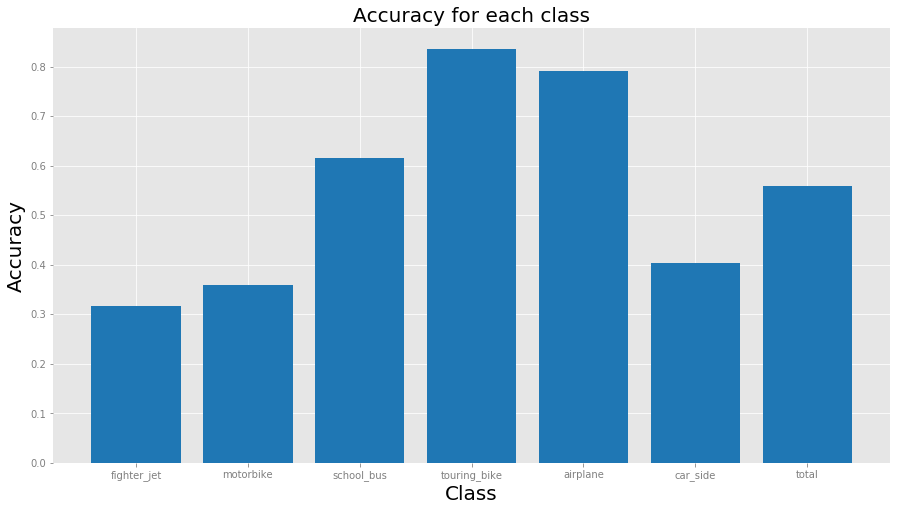

In [23]:
plot_bar_x(classes.index, classes.accuracy.values, 'Class', 'Accuracy for each class')

In [24]:
ks = grouped.groupby('knn neighbors').sum()
    
ks.loc['average', 'prediction_correct'] = ks['prediction_correct'].sum()
ks.loc['average', 'num_images'] = ks['num_images'].sum()
ks['accuracy'] = ks['prediction_correct'] / ks['num_images']

In [25]:
ks

,prediction_correct,num_images,accuracy
knn neighbors,,,
2,458.0,868.0,0.527650
3,494.0,868.0,0.569124
5,486.0,868.0,0.559908
7,490.0,868.0,0.564516
11,494.0,868.0,0.569124
17,480.0,868.0,0.552995
25,474.0,868.0,0.546083
61,505.0,868.0,0.581797
average,3881.0,6944.0,0.558900


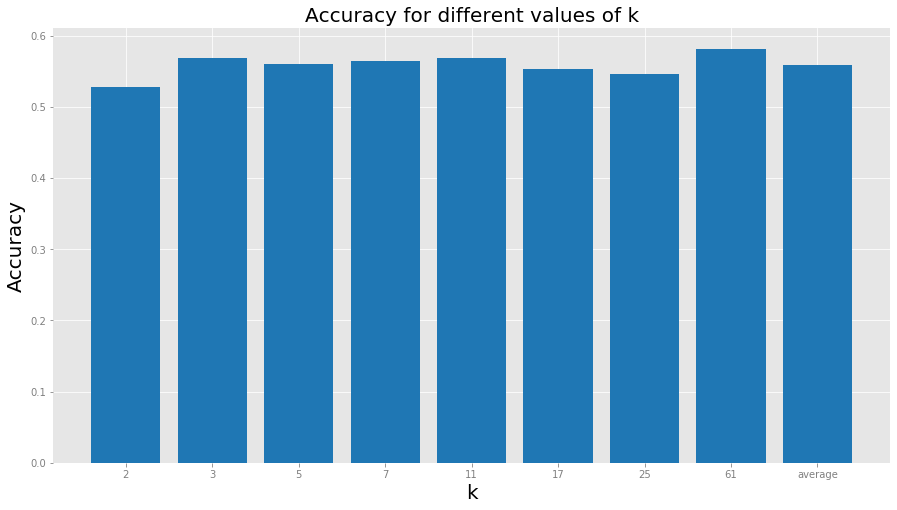

In [27]:
plot_bar_x(ks.index, ks.accuracy.values, 'k', 'Accuracy for different values of k')

In [28]:
norms = grouped.groupby('normalization').sum()

norms['accuracy'] = norms['prediction_correct'] / norms['num_images']

In [29]:
norms

,prediction_correct,num_images,accuracy
normalization,,,
False,2081.0,3472,0.599366
True,1800.0,3472,0.518433


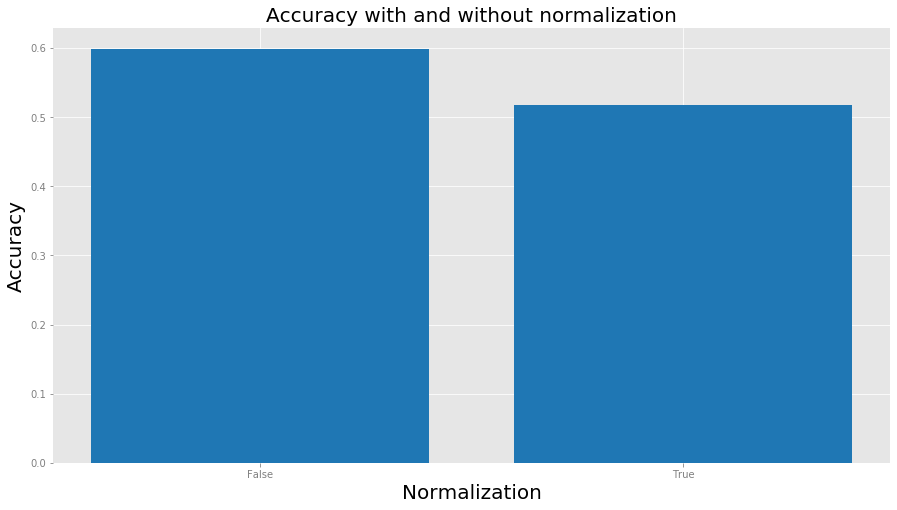

In [30]:
plot_bar_x(norms.index, norms.accuracy.values, 'Normalization', 'Accuracy with and without normalization')

In [34]:
words = grouped.groupby('vocabulary_words').sum()

words['accuracy'] = words['prediction_correct'] / words['num_images']

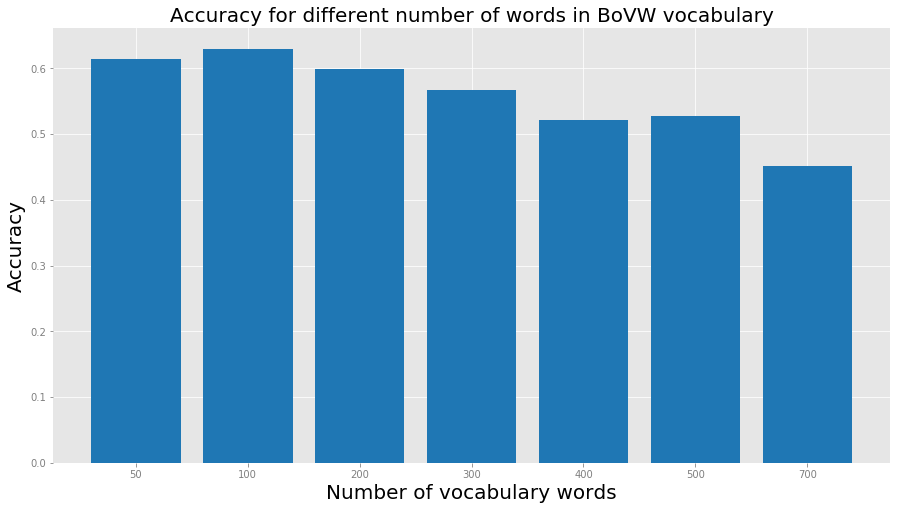

In [35]:
plot_bar_x(words.index, words.accuracy.values, 'Number of vocabulary words', 'Accuracy for different number of words in BoVW vocabulary')